## Wrangling on WeRateDogs Data

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#GATHERING)
- [Part II - Assessing the data](#ASSESSING)
- [Part III - Cleaning](#CLEANING)
- [Part IV - Analyzing](#Analyzing)




<a id='intro'></a>
### Introduction

This project was performed to demonstrate wrangling skills in gathering dataset locally, and from the internet prgrammatically, from twitter api, and the various steps involved in assessing and cleaning the dataset by improving the data quality and tidiness. The dataset is gotten from a twitter page, WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10 and so on.


source:
- https://en.wikipedia.org/wiki/WeRateDogs
- https://twitter.com/dog_rates


In [1]:
#importing needed libraries

import pandas as pd
import wptools
import glob
import os
import json
import requests
from PIL import Image
from io import BytesIO
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='intro'></a>
### GATHERING

In [2]:
#loading the twitter_archive_enhanced.csv using pandas 

df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

### downloading programmatically the file 'image-predictions.tsv' from Udacity servers using requests

In [3]:
# Make directory if it doesn't already exist and download the file to the directory
directory = os.getcwd()
if not os.path.exists(directory):
    os.makedirs(directory)
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(os.path.join(directory,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

#i= Image.open(BytesIO(r.content))

os.listdir(directory)


['wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'highest_engagement_day.png',
 'tweet-json.txt',
 'image_clean.csv',
 'wrangle_act-Copy1.ipynb',
 'tweets_clean.csv',
 'image_pred_clean_df.csv',
 'archive_clean.csv',
 'master_df.csv',
 'dog_ratings.png',
 'dog_likes.png',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'twit_archive_clean_df.csv',
 'image-predictions.tsv',
 'wrangle_report.ipynb',
 'act_report.ipynb',
 'tweets_clean_df.csv',
 'wrangle_report.pdf']

In [4]:
#loading in the image_predictions tsv file using pandas 

df_image_pred = pd.read_csv('image-predictions.tsv',sep='\t')
df_image_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [5]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### downloading the file from Twitter's API

I was not able to download from twitter API due to not having the developer's account yet.

I have copied the given code below from the Udacity Classroom

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### Reading tweet-json.txt file line by line into a pandas DataFrame with tweet ID, retweet count,  favorite count, user_id, timestamp, and tweet full text

In [6]:
tweets_list = []

with open('tweet-json.txt') as file:
    
    for line in file:
        try:
            tweets = json.loads(line)
            tweets_list.append(tweets)
        except:
            continue
    file.close()

#Extracting data from file
tweet_data = []
for tweet in tweets_list:
  
    tweet_data.append({'tweet_id': tweet['id'],'favorite_count': tweet['favorite_count'],'retweet_count': tweet['retweet_count'],
                       'full_text': tweet['full_text'],'timestamp': tweet['created_at'],
                       'user_id': tweet['user']['id']})
    
#store into a pandas dataframe

df_tweets = pd.DataFrame(tweet_data, columns = ['tweet_id','user_id','timestamp','favorite_count','retweet_count','full_text'])
                                               
                                               
                                               
                                               
                                               

In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   user_id         2354 non-null   int64 
 2   timestamp       2354 non-null   object
 3   favorite_count  2354 non-null   int64 
 4   retweet_count   2354 non-null   int64 
 5   full_text       2354 non-null   object
dtypes: int64(4), object(2)
memory usage: 110.5+ KB


<a id='intro'></a>
### ASSESSING

### df_twitter_archive Table

In [8]:
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_twitter_archive.name.value_counts()
df_twitter_archive.name.nunique()

957

In [11]:
df_twitter_archive[df_twitter_archive.name.duplicated()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
23    2017-07-19 00:47:34 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
23    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
7     When you watch your owner call another dog a g...                  NaN   
12    Here's a puppo that seems to be on the fence a...                  NaN   
23    This is Canela. She attempted some fancy porch...                  NaN   
24    You may not have known you needed to see this ...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
7                          NaN                        NaN   
12                         NaN                        NaN   
23                         NaN                        NaN   
24                         NaN                        NaN   
25                         NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
7     https://twitter.com/dog_rates/status/890729181...                13   
12    https://twitter.com/dog_rates/status/889665388...                13   
23    https://twitter.com/dog_rates/status/887473957...                13   
24    https://twitt

In [12]:
#all denominator values should be 10 only

df_twitter_archive.rating_denominator.nunique()

18

In [13]:
df_twitter_archive['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [14]:
df_twitter_archive['rating_numerator'].isnull().sum()

0

In [15]:
df_twitter_archive['tweet_id'].nunique()

2356

In [16]:
sum(df_twitter_archive['expanded_urls'].isnull())

59

In [17]:
df_twitter_archive.expanded_urls.sample(20)

152     https://twitter.com/dog_rates/status/862722525...
527     https://twitter.com/dog_rates/status/808733504...
578     https://twitter.com/dog_rates/status/800751577...
94      https://twitter.com/dog_rates/status/874012996...
1800    https://twitter.com/dog_rates/status/676975532...
23      https://twitter.com/dog_rates/status/887473957...
353     https://twitter.com/dog_rates/status/831309418...
532     https://twitter.com/dog_rates/status/808001312...
1405    https://twitter.com/dog_rates/status/699323444...
1545    https://twitter.com/dog_rates/status/689289219...
37      https://twitter.com/dog_rates/status/885167619...
907     https://twitter.com/dog_rates/status/757741869...
416     https://twitter.com/dog_rates/status/822610361...
998     https://twitter.com/dog_rates/status/748307329...
791     https://twitter.com/dog_rates/status/773704687...
1863    https://twitter.com/dog_rates/status/675372240...
2305    https://twitter.com/dog_rates/status/666837028...
1506    https:

In [18]:
#checking for instances where the rating denominator is not equal to 10

df_twitter_archive[df_twitter_archive['rating_denominator']!= 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [19]:
df_twitter_archive['rating_numerator']

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

In [20]:
#checking the values in rating_numerator

df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### df_image_pred Table Assessment

In [21]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#checking for places where number 1 prediction for dogs isn't a dog breed

df_image_pred[df_image_pred['p1_dog']== False]

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
...                  ...                                                ...   
2026  882045870035918850    https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2071  891689557279858688    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
6           1        box_turtle  0.933012   False          mud_turtle   
8           1     shopping_cart  0.962465   False     shopping_basket   
17          1               hen  0.965932   False                cock   
18          1  desktop_computer  0.086502   False                desk   
21          1  three-toed_sloth  0.914671   False               otter   
...       ...               ...       ...     ...                 ...   
2026        1          web_site  0.949591   False               dhole   
2046        1       convertible  0.738995   False          sports_car   
2052        1         limousine  0.130432   False           tow_truck   
2071        1       paper_towel  0.170278   False  Labrador_retriever   
2074        1            orange  0.097049   False               bagel   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
6     0.045885   False          terrapin  0.017885   False  
8     0.014594   False  golden_retriever  0.007959    True  
17    0.033919   False         partridge  0.000052   False  
18    0.085547   False          bookcase  0.079480   False  
21    0.015250   False    great_grey_owl  0.013207   False  
...        ...     ...               ...       ...     ...  
2026  0.017326   False  golden_retriever  0.006941    True  
2046  0.139952   False         car_wheel  0.044173   False  
2052  0.029175   False     shopping_cart  0.026321   False  
2071  0.168086    True           spatula  0.040836   False  
2074  0.085851   False            banana  0.076110   False  

[543 rows x 12 columns]

In [23]:
#checking for places where number 2 prediction for dogs isn't a dog breed
df_image_pred[df_image_pred['p2_dog']== False]

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
...                  ...                                                ...   
2044  886258384151887873    https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
8           1     shopping_cart  0.962465   False  shopping_basket  0.014594   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
...       ...               ...       ...     ...              ...       ...   
2044        1               pug  0.943575    True       shower_cap  0.025286   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2050        1  Mexican_hairless  0.330741    True         sea_lion  0.275645   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog                p3   p3_conf  p3_dog  
6      False          terrapin  0.017885   False  
8      False  golden_retriever  0.007959    True  
17     False         partridge  0.000052   False  
18     False          bookcase  0.079480   False  
21     False    great_grey_owl  0.013207   False  
...      ...               ...       ...     ...  
2044   False       Siamese_cat  0.002849   False  
2046   False         car_wheel  0.044173   False  
2050   False        Weimaraner  0.134203    True  
2052   False     shopping_cart  0.026321   False  
2074   False            banana  0.076110   False  

[522 rows x 12 columns]

In [24]:
#checking for places where number 3 prediction for dogs isn't a dog breed
df_image_pred[df_image_pred['p3_dog']== False]

tweet_id                                          jpg_url  \
6     666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
17    666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
...                  ...                                              ...   
2063  889880896479866881  https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg   
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                        p1   p1_conf  p1_dog                  p2  \
6           1                box_turtle  0.933012   False          mud_turtle   
7           1                      chow  0.692517    True     Tibetan_mastiff   
17          1                       hen  0.965932   False                cock   
18          1          desktop_computer  0.086502   False                desk   
21          1          three-toed_sloth  0.914671   False               otter   
...       ...                       ...       ...     ...                 ...   
2063        1            French_bulldog  0.377417    True  Labrador_retriever   
2068        1               Appenzeller  0.341703    True       Border_collie   
2069        1  Chesapeake_Bay_retriever  0.425595    True       Irish_terrier   
2071        1               paper_towel  0.170278   False  Labrador_retriever   
2074        1                    orange  0.097049   False               bagel   

       p2_conf  p2_dog               p3   p3_conf  p3_dog  
6     0.045885   False         terrapin  0.017885   False  
7     0.058279    True         fur_coat  0.054449   False  
17    0.033919   False        partridge  0.000052   False  
18    0.085547   False         bookcase  0.079480   False  
21    0.015250   False   great_grey_owl  0.013207   False  
...        ...     ...              ...       ...     ...  
2063  0.151317    True           muzzle  0.082981   False  
2068  0.199287    True        ice_lolly  0.193548   False  
2069  0.116317    True  Indian_elephant  0.076902   False  
2071  0.168086    True          spatula  0.040836   False  
2074  0.085851   False           banana  0.076110   False  

[576 rows x 12 columns]

### df_tweets Table 

In [25]:
df_tweets

tweet_id     user_id                       timestamp  \
0     892420643555336193  4196983835  Tue Aug 01 16:23:56 +0000 2017   
1     892177421306343426  4196983835  Tue Aug 01 00:17:27 +0000 2017   
2     891815181378084864  4196983835  Mon Jul 31 00:18:03 +0000 2017   
3     891689557279858688  4196983835  Sun Jul 30 15:58:51 +0000 2017   
4     891327558926688256  4196983835  Sat Jul 29 16:00:24 +0000 2017   
...                  ...         ...                             ...   
2349  666049248165822465  4196983835  Mon Nov 16 00:24:50 +0000 2015   
2350  666044226329800704  4196983835  Mon Nov 16 00:04:52 +0000 2015   
2351  666033412701032449  4196983835  Sun Nov 15 23:21:54 +0000 2015   
2352  666029285002620928  4196983835  Sun Nov 15 23:05:30 +0000 2015   
2353  666020888022790149  4196983835  Sun Nov 15 22:32:08 +0000 2015   

      favorite_count  retweet_count  \
0              39467           8853   
1              33819           6514   
2              25461           4328   
3              42908           8964   
4              41048           9774   
...              ...            ...   
2349             111             41   
2350             311            147   
2351             128             47   
2352             132             48   
2353            2535            532   

                                              full_text  
0     This is Phineas. He's a mystical boy. Only eve...  
1     This is Tilly. She's just checking pup on you....  
2     This is Archie. He is a rare Norwegian Pouncin...  
3     This is Darla. She commenced a snooze mid meal...  
4     This is Franklin. He would like you to stop ca...  
...                                                 ...  
2349  Here we have a 1949 1st generation vulpix. Enj...  
2350  This is a purebred Piers Morgan. Loves to Netf...  
2351  Here is a very happy pup. Big fan of well-main...  
2352  This is a western brown Mitsubishi terrier. Up...  
2353  Here we have a Japanese Irish Setter. Lost eye...  

[2354 rows x 6 columns]

In [26]:
df_tweets.describe()

tweet_id       user_id  favorite_count  retweet_count
count  2.354000e+03  2.354000e+03     2354.000000    2354.000000
mean   7.426978e+17  4.196984e+09     8080.968564    3164.797366
std    6.852812e+16  0.000000e+00    11814.771334    5284.770364
min    6.660209e+17  4.196984e+09        0.000000       0.000000
25%    6.783975e+17  4.196984e+09     1415.000000     624.500000
50%    7.194596e+17  4.196984e+09     3603.500000    1473.500000
75%    7.993058e+17  4.196984e+09    10122.250000    3652.000000
max    8.924206e+17  4.196984e+09   132810.000000   79515.000000

In [27]:
df_tweets.retweet_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
        ...  
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: int64

In [28]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   user_id         2354 non-null   int64 
 2   timestamp       2354 non-null   object
 3   favorite_count  2354 non-null   int64 
 4   retweet_count   2354 non-null   int64 
 5   full_text       2354 non-null   object
dtypes: int64(4), object(2)
memory usage: 110.5+ KB


In [29]:
#user_id in df_tweets dataframe has just one value

df_tweets.user_id.nunique()

1

In [30]:
#finding duplicate column names
all_columns = pd.Series(list(df_twitter_archive) + list(df_image_pred) + list(df_tweets))
all_columns[all_columns.duplicated()]

17     tweet_id
29     tweet_id
31    timestamp
dtype: object

### Quality Issues 

##### df_twitter_archive Table

1. in_reply_to_status_id column has 2,278 entires as null values out of 2356 that needs to be dropped

2. in_reply_to_user_id column has 2,278 entires as null values out of 2356 that needs to be dropped

3. retweeted_status_id column has 2,175 as null values out of 2356 that needs to be dropped

4. retweeted_status_user_id column has 2,175 as null values out of 2356 that needs to be dropped
 
5. retweeted_status_timestamp column has 2,175 as null values out of 2356 that needs to be dropped

6. timestamp column has object dtype instead of datetime dtype

7. tweet_id data type is integer instead of object (string)

8. rating_denominator has values other than 10. All denominator values should be 10 only



##### df_image_pred Table
1. tweet_id data type is integer instead of object (string)
2. places where prediction for dogs isn't a dog breed (ie False)in p1_dog, p2_dog, p3_dog columns should be dropped
3. afterwards,'p1_dog', 'p2_dog' and 'p3 dog', columns can be dropped as all values become True and it becomes redundant.
4. 'jpg_url' 'p1', 'p1_conf', 'p2','p2_conf', 'p3', 'p3_conf', are not descriptive enough and need to be renamed

5. Capitalize the first letter of names p1, p2, p3 columns for consistency


##### df_tweets Table
1. tweet_id datatype is integer instead of object (string)
2. user_id in df_tweets dataframe has just one value



### Tidiness issues 

1. doggo, floofer, pupper, puppo columns are dog stages data appear as separate variables can all be grouped as one variable (dog_stage column)

2. tweet_id and timestamp columns in df_twitter_archive table duplicated in df_image_pred and df_tweets tables. This will be handled when merging the data frames

3. 'timestamp' column in tweets_clean_df table can be splitted into'day', 'month' and 'year' columns using slicing to aid analysis

4. rating column from rating_numerator/rating_denominatorin twit_archive_clean_df table

5. combine tweets_clean_df,image_pred_clean_df with twit_archive_clean_df to make one master dataframe

6. text and full_text columns contain same information

7. timestamp column will no longer be needed




<a id='intro'></a>
### CLEANING

In [31]:
#making a copy of all the dataframe before cleaning

twit_archive_clean_df = df_twitter_archive.copy()
image_pred_clean_df = df_image_pred.copy()
tweets_clean_df = df_tweets.copy()


### Missing data


#### `twit_archive_clean_df`: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns needs to be dropped

##### define
Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns


#### Code

In [32]:
twit_archive_clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis = 1,inplace = True)




#### Test

In [33]:
twit_archive_clean_df.head(3)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

### Incorrect Datatype

#### `twit_archive_clean_df`: timestamp column has object dtype instead of datetime dtype

##### define

Change timestamp column  object dtype to datetime dtype


#### Code

In [34]:
#checking the timestamp format 
twit_archive_clean_df.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [35]:
twit_archive_clean_df['timestamp'] = pd.to_datetime(twit_archive_clean_df['timestamp'], format='%Y/%m/%d %H:%M:%S.%f')

#### Test

In [36]:
twit_archive_clean_df.timestamp.dtypes

datetime64[ns, UTC]

In [37]:
twit_archive_clean_df.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

#### `twit_archive_clean_df`: tweet_id data type is integer instead of object (string)

##### Define

tweet_id column has integer dtype instead of object (string) dtype



##### Code

In [38]:
twit_archive_clean_df['tweet_id'] = twit_archive_clean_df['tweet_id'].astype(str)

##### Test

In [39]:
twit_archive_clean_df.tweet_id.dtypes

dtype('O')

### Incorrect Denominator Rating Entries

####  `twit_archive_clean_df`: rating_denominator has values other than 10. All denominator values should be 10 only

##### Define

To drop rating_denominator column with values other than 10

#### Code

In [40]:
#Make twit_archive_clean_df.rating_denominator column to be only values =10 
twit_archive_clean_df = twit_archive_clean_df[twit_archive_clean_df.rating_denominator ==10]


#### Test

In [41]:
twit_archive_clean_df.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

###  Incorrect Datatype

####  `image_pred_clean_df`: tweet_id data type is integer instead of object (string)

##### Define
Change tweet_id column integer dtype to object dtype

#### Code

In [42]:
#checking the tweet_id format 
image_pred_clean_df.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [43]:
image_pred_clean_df['tweet_id'] = image_pred_clean_df['tweet_id'].astype(str)

#### Test

In [44]:
image_pred_clean_df.tweet_id.dtypes

dtype('O')

### Invalid Data Entries for Dog breeds

####  `image_pred_clean_df`: places where prediction for dogs isn't a dog breed (ie False)in p1_dog, p2_dog, p3_dog columns should be dropped

#### Define
To drop places where prediction for dogs isn't a dog breed (ie False)in p1_dog, p2_dog, p3_dog columns 
To drop 'p1_dog', 'p2_dog' and 'p3 dog', columns as all values become True and it becomes redundant.

#### Code

In [46]:
# drop all false dog breeds predictions from the dataframe
image_pred_clean_df = image_pred_clean_df[image_pred_clean_df.p1_dog == True]
image_pred_clean_df = image_pred_clean_df[image_pred_clean_df.p2_dog == True]
image_pred_clean_df = image_pred_clean_df[image_pred_clean_df.p3_dog == True]

#### Test

In [47]:
image_pred_clean_df.p1_dog.value_counts()

True    1243
Name: p1_dog, dtype: int64

In [48]:
image_pred_clean_df.p2_dog.value_counts()

True    1243
Name: p2_dog, dtype: int64

In [49]:
image_pred_clean_df.p3_dog.value_counts()

True    1243
Name: p3_dog, dtype: int64

#### Define
To drop 'p1_dog', 'p2_dog' and 'p3 dog', columns as all values become True and it becomes redundant.


#### Code

In [50]:
#Since these columns are now all true, dropping these three columns  'p1_dog', 'p2_dog' and 'p3 dog', 
#to reduce redundancy

image_pred_clean_df.drop(['p1_dog','p2_dog','p3_dog'],axis =1, inplace = True)

#### Test

In [51]:
#columns have been dropped 

image_pred_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p2', 'p2_conf',
       'p3', 'p3_conf'],
      dtype='object')

###  Non-descriptive column names

####  `image_pred_clean_df`: columns 'jpg_url' 'p1', 'p1_conf', 'p2','p2_conf', 'p3', 'p3_conf', are not descriptive enough and need to be renamed


#### Define
Rename columns 'p1', 'p1_conf', 'p2','p2_conf', 'p3', 'p3_conf'

In [52]:
#Renaming columns 'p1', 'p1_conf', 'p2','p2_conf', 'p3', 'p3_conf'

image_pred_clean_df = image_pred_clean_df.rename(columns = {'jpg_url':'image_url',
    'p1':'image1_prediction','p1_conf':'image1_confidence',
                                                           'p2':'image2_prediction','p2_conf':'image2_confidence',
                                                            'p3':'image3_prediction','p3_conf':'image3_confidence'})

#### Test

In [53]:
image_pred_clean_df.head()

tweet_id                                        image_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num       image1_prediction  image1_confidence   image2_prediction  \
0        1  Welsh_springer_spaniel           0.465074              collie   
1        1                 redbone           0.506826  miniature_pinscher   
2        1         German_shepherd           0.596461            malinois   
3        1     Rhodesian_ridgeback           0.408143             redbone   
4        1      miniature_pinscher           0.560311          Rottweiler   

   image2_confidence    image3_prediction  image3_confidence  
0           0.156665    Shetland_sheepdog           0.061428  
1           0.074192  Rhodesian_ridgeback           0.072010  
2           0.138584           bloodhound           0.116197  
3           0.360687   miniature_pinscher           0.222752  
4           0.243682             Doberman           0.154629

####  `image_pred_clean_df`: Capitalize the first letter of names p1, p2, p3 columns for consistency

#### Define
To Capitalize the first letter of names image1_prediction, image2_prediction, image3_prediction columns for consistency


#### Code

In [54]:
image_pred_clean_df.image1_prediction.replace('_', ' ', regex=True, inplace = True)
image_pred_clean_df.image2_prediction.replace('_', ' ', regex=True, inplace = True)
image_pred_clean_df.image3_prediction.replace('_', ' ', regex=True, inplace = True)

In [55]:
image_pred_clean_df['image1_prediction'] = image_pred_clean_df.image1_prediction.str.title()
image_pred_clean_df['image2_prediction'] = image_pred_clean_df.image2_prediction.str.title()
image_pred_clean_df['image3_prediction'] = image_pred_clean_df.image3_prediction.str.title()

#### Test

In [56]:
image_pred_clean_df

tweet_id                                        image_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2066  890609185150312448  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num       image1_prediction  image1_confidence   image2_prediction  \
0           1  Welsh Springer Spaniel           0.465074              Collie   
1           1                 Redbone           0.506826  Miniature Pinscher   
2           1         German Shepherd           0.596461            Malinois   
3           1     Rhodesian Ridgeback           0.408143             Redbone   
4           1      Miniature Pinscher           0.560311          Rottweiler   
...       ...                     ...                ...                 ...   
2066        1           Irish Terrier           0.487574        Irish Setter   
2067        2              Pomeranian           0.566142          Eskimo Dog   
2070        2                  Basset           0.555712    English Springer   
2072        1               Chihuahua           0.716012            Malamute   
2073        1               Chihuahua           0.323581            Pekinese   

      image2_confidence            image3_prediction  image3_confidence  
0              0.156665            Shetland Sheepdog           0.061428  
1              0.074192          Rhodesian Ridgeback           0.072010  
2              0.138584                   Bloodhound           0.116197  
3              0.360687           Miniature Pinscher           0.222752  
4              0.243682                     Doberman           0.154629  
...                 ...                          ...                ...  
2066           0.193054     Chesapeake Bay Retriever           0.118184  
2067           0.178406                     Pembroke           0.076507  
2070           0.225770  German Short-Haired Pointer           0.175219  
2072           0.078253                       Kelpie           0.031379  
2073           0.090647                     Papillon           0.068957  

[1243 rows x 9 columns]

### Incorrect Datatypes in tweets_clean_df table

####  `tweets_clean_df`:  tweet_id and user_id  datatype is integer instead of object (string)

#### Define 

Change tweet_id datatype from integer to object (string)

#### Code

In [57]:
tweets_clean_df['tweet_id'] = tweets_clean_df['tweet_id'].astype(str)


#### Test 

In [58]:
tweets_clean_df['tweet_id'].dtypes


dtype('O')

#### Define
split 'timestamp' column into 'day', 'month' and 'year' using slicing and drop timestamp column

#### Code

In [59]:

tweets_clean_df['day'] = tweets_clean_df['timestamp'].str[ :3]
tweets_clean_df['month'] = tweets_clean_df['timestamp'].str[4:7]
tweets_clean_df['year'] = tweets_clean_df['timestamp'].str[-4: ]

tweets_clean_df.drop('timestamp',axis = 1, inplace = True)

#### Test

In [60]:
tweets_clean_df

tweet_id     user_id  favorite_count  retweet_count  \
0     892420643555336193  4196983835           39467           8853   
1     892177421306343426  4196983835           33819           6514   
2     891815181378084864  4196983835           25461           4328   
3     891689557279858688  4196983835           42908           8964   
4     891327558926688256  4196983835           41048           9774   
...                  ...         ...             ...            ...   
2349  666049248165822465  4196983835             111             41   
2350  666044226329800704  4196983835             311            147   
2351  666033412701032449  4196983835             128             47   
2352  666029285002620928  4196983835             132             48   
2353  666020888022790149  4196983835            2535            532   

                                              full_text  day month  year  
0     This is Phineas. He's a mystical boy. Only eve...  Tue   Aug  2017  
1     This is Tilly. She's just checking pup on you....  Tue   Aug  2017  
2     This is Archie. He is a rare Norwegian Pouncin...  Mon   Jul  2017  
3     This is Darla. She commenced a snooze mid meal...  Sun   Jul  2017  
4     This is Franklin. He would like you to stop ca...  Sat   Jul  2017  
...                                                 ...  ...   ...   ...  
2349  Here we have a 1949 1st generation vulpix. Enj...  Mon   Nov  2015  
2350  This is a purebred Piers Morgan. Loves to Netf...  Mon   Nov  2015  
2351  Here is a very happy pup. Big fan of well-main...  Sun   Nov  2015  
2352  This is a western brown Mitsubishi terrier. Up...  Sun   Nov  2015  
2353  Here we have a Japanese Irish Setter. Lost eye...  Sun   Nov  2015  

[2354 rows x 8 columns]

### Invalid Entry in tweets_clean_df table

####  `tweets_clean_df`:  user_id in df_tweets dataframe has just one value

#### Define 
To drop user_id column in df_tweets dataframe

#### Code

In [61]:
tweets_clean_df.drop('user_id',axis = 1, inplace = True)

#### Test

In [62]:
tweets_clean_df

tweet_id  favorite_count  retweet_count  \
0     892420643555336193           39467           8853   
1     892177421306343426           33819           6514   
2     891815181378084864           25461           4328   
3     891689557279858688           42908           8964   
4     891327558926688256           41048           9774   
...                  ...             ...            ...   
2349  666049248165822465             111             41   
2350  666044226329800704             311            147   
2351  666033412701032449             128             47   
2352  666029285002620928             132             48   
2353  666020888022790149            2535            532   

                                              full_text  day month  year  
0     This is Phineas. He's a mystical boy. Only eve...  Tue   Aug  2017  
1     This is Tilly. She's just checking pup on you....  Tue   Aug  2017  
2     This is Archie. He is a rare Norwegian Pouncin...  Mon   Jul  2017  
3     This is Darla. She commenced a snooze mid meal...  Sun   Jul  2017  
4     This is Franklin. He would like you to stop ca...  Sat   Jul  2017  
...                                                 ...  ...   ...   ...  
2349  Here we have a 1949 1st generation vulpix. Enj...  Mon   Nov  2015  
2350  This is a purebred Piers Morgan. Loves to Netf...  Mon   Nov  2015  
2351  Here is a very happy pup. Big fan of well-main...  Sun   Nov  2015  
2352  This is a western brown Mitsubishi terrier. Up...  Sun   Nov  2015  
2353  Here we have a Japanese Irish Setter. Lost eye...  Sun   Nov  2015  

[2354 rows x 7 columns]

### Tidiness issues 

### Values as Column Name in twit_archive_clean_df Table:  

#### Define: 

Create new variable 'dog_stage' column  for doggo, floofer, pupper, puppo columns 

In [63]:
twit_archive_clean_df.head(2)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [64]:
twit_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2333 non-null   object             
 1   timestamp           2333 non-null   datetime64[ns, UTC]
 2   source              2333 non-null   object             
 3   text                2333 non-null   object             
 4   expanded_urls       2278 non-null   object             
 5   rating_numerator    2333 non-null   int64              
 6   rating_denominator  2333 non-null   int64              
 7   name                2333 non-null   object             
 8   doggo               2333 non-null   object             
 9   floofer             2333 non-null   object             
 10  pupper              2333 non-null   object             
 11  puppo               2333 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Code

In [65]:
#extract dog stage from tweet's text and store in a new column dog_stage

twit_archive_clean_df['dog_stage'] = twit_archive_clean_df.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)


In [67]:
twit_archive_clean_df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [68]:
twit_archive_clean_df.sample(10)

tweet_id                 timestamp  \
1970  673295268553605120 2015-12-06 00:17:55+00:00   
140   865006731092295680 2017-05-18 00:50:50+00:00   
2249  667861340749471744 2015-11-21 00:25:26+00:00   
1762  678643457146150913 2015-12-20 18:29:43+00:00   
380   827600520311402496 2017-02-03 19:31:54+00:00   
1557  688804835492233216 2016-01-17 19:27:24+00:00   
1024  746507379341139972 2016-06-25 00:56:43+00:00   
2131  670086499208155136 2015-11-27 03:47:25+00:00   
392   826115272272650244 2017-01-30 17:10:04+00:00   
7     890729181411237888 2017-07-28 00:22:40+00:00   

                                                 source  \
1970  <a href="http://twitter.com/download/iphone" r...   
140   <a href="http://twitter.com/download/iphone" r...   
2249  <a href="http://twitter.com/download/iphone" r...   
1762  <a href="http://twitter.com/download/iphone" r...   
380   <a href="http://twitter.com/download/iphone" r...   
1557  <a href="http://twitter.com/download/iphone" r...   
1024  <a href="http://twitter.com/download/iphone" r...   
2131  <a href="http://twitter.com/download/iphone" r...   
392   <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1970  Meet Eve. She's a raging alcoholic 8/10 (would...   
140   This is Nelly. He really hopes you like his Ha...   
2249  This is a Shotokon Macadamia mix named Cheryl....   
1762  Meet Grizz. He just arrived. Couldn't wait unt...   
380   Meet Tucker. It's his birthday. He's pupset wi...   
1557  When you stumble but recover quickly cause you...   
1024  This is Shiloh. She did not pass the soft mout...   
2131  "Hi yes this is dog. I can't help with that s-...   
392   This is Ike. He's demonstrating the pupmost re...   
7     When you watch your owner call another dog a g...   

                                          expanded_urls  rating_numerator  \
1970  https://twitter.com/dog_rates/status/673295268...                 8   
140   https://twitter.com/dog_rates/status/865006731...                13   
2249  https://twitter.com/dog_rates/status/667861340...                 9   
1762  https://twitter.com/dog_rates/status/678643457...                10   
380   https://twitter.com/dog_rates/status/827600520...                13   
1557  https://twitter.com/dog_rates/status/688804835...                12   
1024  https://twitter.com/dog_rates/status/746507379...                10   
2131  https://twitter.com/dog_rates/status/670086499...                10   
392   https://twitter.com/dog_rates/status/826115272...                13   
7     https://twitter.com/dog_rates/status/890729181...                13   

      rating_denominator    name dog_stage  
1970                  10     Eve    pupper  
140                   10   Nelly       NaN  
2249                  10       a       NaN  
1762                  10   Grizz       NaN  
380                   10  Tucker       NaN  
1557                  10    None       NaN  
1024                  10  Shiloh       NaN  
2131                  10    None       NaN  
392                   10     Ike       NaN  
7                     10    None       NaN

In [74]:
twit_archive_clean_df.dog_stage.value_counts()

pupper     259
doggo       92
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [75]:
twit_archive_clean_df.dog_stage.nunique()

4

### ratings column in twit_archive_clean_df Table:   rating column from rating_numerator/rating_denominator

#### Define: 
Create a rating column in twit_archive_clean_df by dividing rating_numerator/rating_denominator

#### Code

In [76]:
twit_archive_clean_df['rating'] = twit_archive_clean_df['rating_numerator']/twit_archive_clean_df['rating_denominator']



#### Test

In [77]:
twit_archive_clean_df.head(3)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name dog_stage  rating  
0                  10  Phineas       NaN     1.3  
1                  10    Tilly       NaN     1.3  
2                  10   Archie       NaN     1.2

### Master Dataframe:

#### Define: 
Save the indiviudal dataframes and then Combine tweets_clean_df,image_pred_clean_df with twit_archive_clean_df to make one master dataframe

#### Code

In [78]:
#check the shape of all dataframes
twit_archive_clean_df.shape,tweets_clean_df.shape,image_pred_clean_df.shape

((2333, 10), (2354, 7), (1243, 9))

In [79]:
#merging twit_archive_clean_df and image_pred_clean_df on inner join
df = pd.merge(twit_archive_clean_df,image_pred_clean_df, on = 'tweet_id',how = 'inner')

In [80]:
df.shape

(1229, 18)

In [81]:
#merging df (twit_archive_clean_df and image_pred_clean_df) and tweets_clean_df on inner join

master_df = pd.merge(df,tweets_clean_df, on = 'tweet_id',how = 'inner')



#### Test

In [82]:

master_df.shape

(1228, 24)

In [83]:
master_df.head(3)

tweet_id                 timestamp  \
0  892177421306343426 2017-08-01 00:17:27+00:00   
1  891815181378084864 2017-07-31 00:18:03+00:00   
2  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  rating  ... image2_prediction  \
0                  10     Tilly       NaN     1.3  ...          Pekinese   
1                  10    Archie       NaN     1.2  ...          Malamute   
2                  10  Franklin       NaN     1.2  ...  English Springer   

   image2_confidence            image3_prediction  image3_confidence  \
0           0.090647                     Papillon           0.068957   
1           0.078253                       Kelpie           0.031379   
2           0.225770  German Short-Haired Pointer           0.175219   

  favorite_count  retweet_count  \
0          33819           6514   
1          25461           4328   
2          41048           9774   

                                           full_text  day  month  year  
0  This is Tilly. She's just checking pup on you....  Tue    Aug  2017  
1  This is Archie. He is a rare Norwegian Pouncin...  Mon    Jul  2017  
2  This is Franklin. He would like you to stop ca...  Sat    Jul  2017  

[3 rows x 24 columns]

In [84]:
#drop full_text column since it holds the same information as text

#drop timestamp column as it is no longer needed

master_df.drop('full_text',axis = 1,inplace=True)


master_df.drop('timestamp',axis = 1,inplace=True)

master_df.drop('source',axis = 1,inplace=True)

<a id='intro'></a>
### Analyzing

In [85]:
#saving the master dataframe
#Saving all to csv

twit_archive_clean_df.to_csv('archive_clean.csv',index = False)
tweets_clean_df.to_csv('tweets_clean.csv',index = False)
image_pred_clean_df.to_csv('image_clean.csv',index = False)

master_df.to_csv('twitter_archive_master.csv',index = False)

In [86]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

tweet_id                                               text  \
0  892177421306343426  This is Tilly. She's just checking pup on you....   
1  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
2  891327558926688256  This is Franklin. He would like you to stop ca...   
3  890729181411237888  When you watch your owner call another dog a g...   
4  890609185150312448  This is Zoey. She doesn't want to be one of th...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891327558...                12   
3  https://twitter.com/dog_rates/status/890729181...                13   
4  https://twitter.com/dog_rates/status/890609185...                13   

   rating_denominator      name dog_stage  rating  \
0                  10     Tilly       NaN     1.3   
1                  10    Archie       NaN     1.2   
2                  10  Franklin       NaN     1.2   
3                  10      None       NaN     1.3   
4                  10      Zoey       NaN     1.3   

                                         image_url  img_num  ...  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1  ...   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1  ...   
2  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2  ...   
3  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg        2  ...   
4  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg        1  ...   

  image1_confidence  image2_prediction image2_confidence  \
0          0.323581           Pekinese          0.090647   
1          0.716012           Malamute          0.078253   
2          0.555712   English Springer          0.225770   
3          0.566142         Eskimo Dog          0.178406   
4          0.487574       Irish Setter          0.193054   

             image3_prediction image3_confidence  favorite_count  \
0                     Papillon          0.068957           33819   
1                       Kelpie          0.031379           25461   
2  German Short-Haired Pointer          0.175219           41048   
3                     Pembroke          0.076507           56848   
4     Chesapeake Bay Retriever          0.118184           28226   

   retweet_count  day month  year  
0           6514  Tue   Aug  2017  
1           4328  Mon   Jul  2017  
2           9774  Sat   Jul  2017  
3          16716  Fri   Jul  2017  
4           4429  Thu   Jul  2017  

[5 rows x 21 columns]

In [87]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1228 non-null   int64  
 1   text                1228 non-null   object 
 2   expanded_urls       1228 non-null   object 
 3   rating_numerator    1228 non-null   int64  
 4   rating_denominator  1228 non-null   int64  
 5   name                1228 non-null   object 
 6   dog_stage           202 non-null    object 
 7   rating              1228 non-null   float64
 8   image_url           1228 non-null   object 
 9   img_num             1228 non-null   int64  
 10  image1_prediction   1228 non-null   object 
 11  image1_confidence   1228 non-null   float64
 12  image2_prediction   1228 non-null   object 
 13  image2_confidence   1228 non-null   float64
 14  image3_prediction   1228 non-null   object 
 15  image3_confidence   1228 non-null   float64
 16  favori

### Columns Description
- 'tweet_id', is the unique tweet id

- 'text' is the tweet describing the dog

- 'expanded_urls'is the full link to the dog rating tweets

- 'rating_numerator' is the dog score 

- 'rating_denominator' is a number fixed at 10

- 'name' is the name of the dog

- 'dog_stage' is the growth stage of the dog

- 'rating' has been standardized by dividing the numerator by the denominator

- 'image_url' is the link to the dogs images

- 'img_num' is the dogs' image number

- 'image1_prediction' is the algorithm's prediction for image 1 in tweet

- 'image1_confidence' is the algorithim's confidence for prediction of image 1

- 'image2_prediction' is the algorithm's second most likely prediction for number 2 image

- 'image2_confidence' is the algorithim's confidence for prediction of image 2

- 'image3_prediction' is the algorithm's third most likely prediction for the number 3 image

- 'image3_confidence' is the algorithim's confidence for prediction of image 3

- 'favorite_count' is the number of twitter likes

- 'retweet_count' the number of retweets

- 'day' is the day of the week of tweet

- 'month' is the month of tweet

- 'year' is the year of tweet

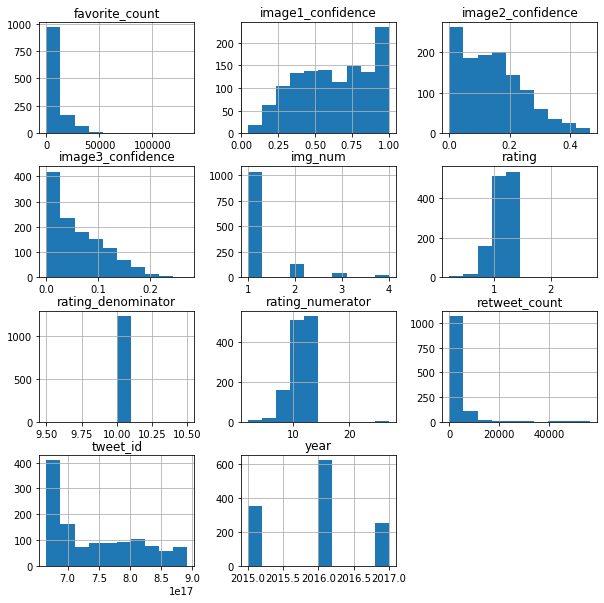

In [88]:
#exploring the data set to see the distribution

twitter_archive_master.hist(figsize=(10,10));

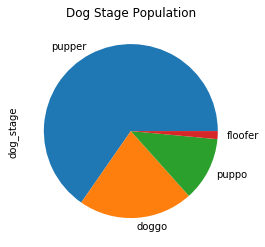

In [96]:
twitter_archive_master.dog_stage.value_counts().plot(kind='pie')
plt.title('Dog Stage Population')
plt.savefig('dog_stages.png')


#### Pupper dog stage is the most common in this data set

### Question 1

#### What day of the week had highest number of engagements? 

The number of likes and retweets of a twitter post can help provide insights

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


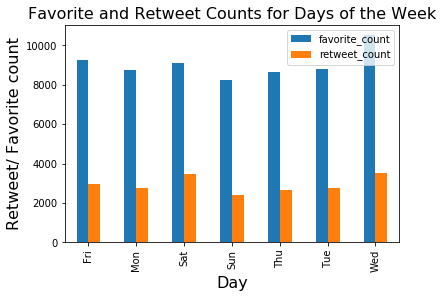

In [98]:
twitter_archive_master.groupby('day')['favorite_count','retweet_count'].mean().plot(kind='bar')
plt.title('Favorite and Retweet Counts for Days of the Week', fontsize = 16)
plt.ylabel('Retweet/ Favorite count', fontsize = 16)
plt.xlabel('Day', fontsize = 16);
plt.savefig('highest_engagement_day.png')

#### From the analysis, wednesdays seem to have the highest number of engagements for likes and retweets.  Fridays and saturdays seem to be days with alot of likes and retweets as well. The WeRateDogs twitter page may consider posting more on these days

### Question 2

#### What dog has the highest rating?

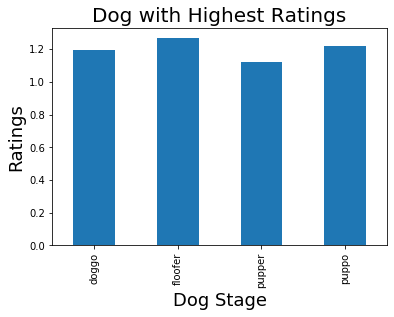

In [94]:
twitter_archive_master.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog with Highest Ratings', fontsize = 20)
plt.ylabel('Ratings', fontsize = 18)
plt.xlabel('Dog Stage', fontsize = 18);
plt.savefig('dog_ratings.png')

#### From the analysis, it appears floofer has the highest ratings!

### Question 3

#### What dog has the highest likes and retweets?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


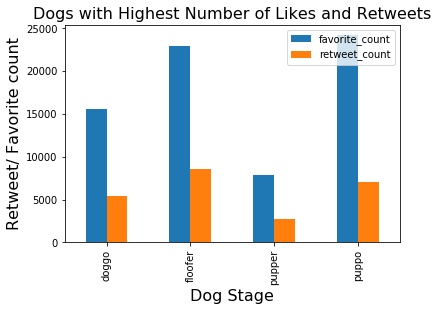

In [100]:
twitter_archive_master.groupby('dog_stage')['favorite_count','retweet_count'].mean().plot(kind='bar')
plt.title('Dogs with Highest Number of Likes and Retweets', fontsize = 16)
plt.ylabel('Retweet/ Favorite count', fontsize = 16)
plt.xlabel('Dog Stage', fontsize = 16);
plt.savefig('dog_likes.png')

#### From the analysis, it appears Puppo has the highest number of likes, while floofer has the highest number of retweets.

#### Conclusion 


The analysis done above may be subject to errors. This is due to the amount of inaccurate data contained in the dataframe. The data set had a lot of invalid entries and as such, the accuracy of the analysis may be compromised. However, the following conclusions were made.

1. Pupper is the most popular dog stage , having the largest population in the cleaned data
2. Wednesdays seem to have the highest number of engagements for likes and retweets
3. Floofer has the highest ratings which is closely followed by puppo and doggo stages.
4. Puppo has the highest number of likes 
5. Floofer has the highest number of retweets.

